In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
%matplotlib inline

In [16]:
df = pd.read_csv('./data01_undersampled.csv')
df

,file_name,age,gender,race,age_cat
0,56_1_0_20170117172544019.jpg.chip.jpg,56,1,0,50
1,50_0_0_20170104212134308.jpg.chip.jpg,50,0,0,50
2,45_0_0_20170111204133863.jpg.chip.jpg,45,0,0,40
3,27_0_0_20170114034255912.jpg.chip.jpg,27,0,0,20
4,26_0_0_20170105183712607.jpg.chip.jpg,26,0,0,20
...,...,...,...,...,...
10270,9_1_2_20161219190524395.jpg.chip.jpg,9,1,2,<20
10271,9_1_2_20161219192342173.jpg.chip.jpg,9,1,2,<20
10272,9_1_2_20161219204347420.jpg.chip.jpg,9,1,2,<20
10273,9_1_2_20170102235115156.jpg.chip.jpg,9,1,2,<20


In [17]:
test_size = round(len(df.index) * 0.2)
test_size

2055

In [18]:
import random

In [29]:
test_index = [random.randint(0, len(df.index) - 1) for _ in range(test_size)]
len(test_index)

2055

In [20]:
df.loc[test_index, :].reset_index(drop=True)

,file_name,age,gender,race,age_cat
0,29_1_2_20170116162958843.jpg.chip.jpg,29,1,2,20
1,34_1_2_20170116193448303.jpg.chip.jpg,34,1,2,30
2,42_0_1_20170113155055273.jpg.chip.jpg,42,0,1,40
3,65_0_1_20170117171258523.jpg.chip.jpg,65,0,1,60
4,4_0_2_20161219141105897.jpg.chip.jpg,4,0,2,<20
...,...,...,...,...,...
2050,60_0_0_20170117001135611.jpg.chip.jpg,60,0,0,60
2051,26_1_2_20170116175900172.jpg.chip.jpg,26,1,2,20
2052,32_0_2_20170104170708615.jpg.chip.jpg,32,0,2,30
2053,40_0_0_20170117170711073.jpg.chip.jpg,40,0,0,40


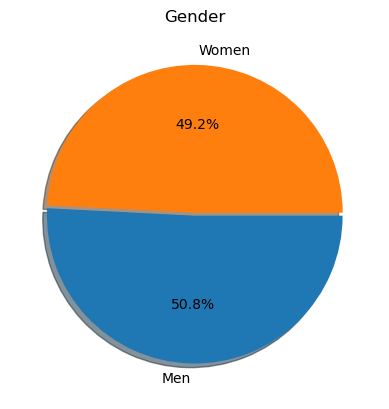

In [21]:
plt.pie(list(df.loc[test_index, :].reset_index(drop=True)['gender'].value_counts()), labels=['Men', 'Women'], 
       autopct='%.1f%%', explode=[0.01, 0.01], counterclock=False, shadow=True)
plt.title('Gender')
plt.show()

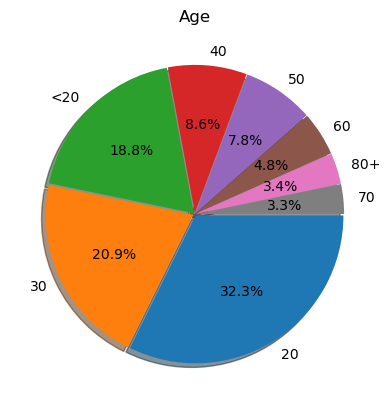

In [22]:
plt.pie(list(df.loc[test_index, :].reset_index(drop=True)['age_cat'].value_counts()), labels=list(df['age_cat'].value_counts().index), 
       autopct='%.1f%%', explode=([0.01] * df['age_cat'].nunique()), counterclock=False, shadow=True)
plt.title('Age')
plt.show()

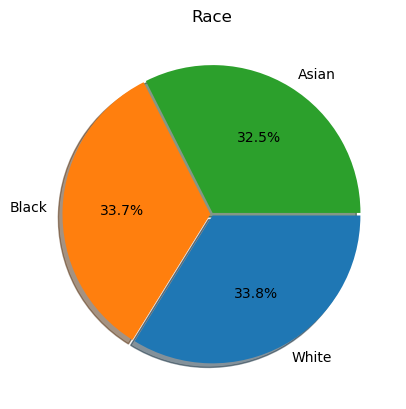

In [23]:
plt.pie(list(df.loc[test_index, :].reset_index(drop=True)['race'].value_counts()), labels=['White', 'Black', 'Asian'], 
       autopct='%.1f%%', explode=([0.01] * df['race'].nunique()), counterclock=False, shadow=True)
plt.title('Race')
plt.show()

In [24]:
print(df.iloc[1, 0])
print(df.iloc[1, 1])
print(df.iloc[1, 2])
print(df.iloc[1, 3])

50_0_0_20170104212134308.jpg.chip.jpg
50
0
0


In [34]:
for idx in df.index :
  file_name = df.iloc[idx, 0]
  img = Image.open('./UTKFace/' + file_name)
  gender = df.iloc[idx, 2]
  race = df.iloc[idx, 3]



  if gender == 0 :
    if idx in test_index :
      img.save('./Test/Gender/Male/' + file_name)

    else :
      img.save('./Train/Gender/Male/' + file_name)

  else :
    if idx in test_index :
      img.save('./Test/Gender/Female/' + file_name)

    else :
      img.save('./Train/Gender/Female/' + file_name)

##################################################################
##################################################################

  if race == 0 :
    if idx in test_index :
      img.save('./Test/Race/White/' + file_name)

    else :
      img.save('./Train/Race/White/' + file_name)

  if race == 1 :
    if idx in test_index :
      img.save('./Test/Race/Black/' + file_name)

    else :
      img.save('./Train/Race/Black/' + file_name)

  if race == 2 :
    if idx in test_index :
      img.save('./Test/Race/Asian/' + file_name)

    else :
      img.save('./Train/Race/Asian/' + file_name)



In [41]:
test = len(os.listdir('./Test/Gender/Female/')) + len(os.listdir('./Test/Gender/Male'))
test

1876

In [36]:
len(os.listdir('./Test/Race/Black/')) + len(os.listdir('./Test/Race/White')) + len(os.listdir('./Test/Race/Asian'))

1876

In [42]:
train = len(os.listdir('./Train/Gender/Female/')) + len(os.listdir('./Train/Gender/Male'))
train

8399

In [38]:
len(os.listdir('./Train/Race/Black/')) + len(os.listdir('./Train/Race/White')) + len(os.listdir('./Train/Race/Asian'))

8399

In [40]:
total = len(os.listdir('./Test/Gender/Female/')) + len(os.listdir('./Test/Gender/Male')) + len(os.listdir('./Train/Gender/Female/')) + len(os.listdir('./Train/Gender/Male'))
total

10275

In [43]:
train / total

0.8174209245742092